<a href="https://colab.research.google.com/github/Vamsi995/DeepLense-ML4SCI-EvalTest/blob/main/DeepLense_Test_III_Learning_Mass_of_DarkMatter_Halo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from tqdm.notebook import tqdm
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import r2_score
import time

seed = 43
torch.manual_seed(seed)

# Utilities


In [ ]:
class LensingData:
  """
    Lensing Data Class is a wrapper class that helps in handling data manipulation.
  """
  def __init__(self, path):
    self.images = {}
    self.masses = {}
    self.path = path
    self.initialize_data_dict()

  def initialize_data_dict(self):
    """
      Initializes images dict and masses dict.
    """
  
    self.images["train"] = []
    self.masses["train"] = []

    self.images["test"] = []
    self.images["val"] = []

    self.masses["test"] = []
    self.masses["val"] = []


  def load(self):
    """ 
      Loads the lensing data into python dictionaries
    """
    for lens_file in tqdm(os.listdir(self.path), desc="Reading lensing data"):
      lens_image, darkmatter_mass = np.load(self.path + lens_file, allow_pickle=True)
      self.images["train"].append(lens_image)
      self.masses["train"].append(darkmatter_mass)
    print("Number of data samples: {}".format(len(self.masses["train"])))

  def min_max_filter(self, image):
    """
      Applies Min-Max filter to the given image
    """
    return (image - image.min())/(image.max() - image.min())

  def get_random_image_sample(self):
    rand_index = random.randrange(len(self.images["train"]))
    return self.images["train"][rand_index]

  def get_random_mass_sample(self):
    rand_index = random.randrange(len(self.masses["train"]))
    return self.masses["train"][rand_index]
    
  def calc_mean_std(self):
    """
      Calculates the mean and std of the entire dataset
    """
    psum = 0
    pstd = 0
    for image in self.images["train"]:
      image = self.min_max_filter(image)
      psum += image.sum() 
      pstd += (image**2).sum()
    
    image = self.get_random_sample()
    height = image.shape[0]
    width = image.shape[1]
    total_pixels = (len(self.images["train"])*height*width)
    mean = psum/total_pixels
    std = np.sqrt((pstd/total_pixels) - (mean**2))

    print("Mean: {}, Std: {}".format(mean, std))
    return mean, std

  
  def train_test_val_split(self):
    """
      Performs train-test-val split of the training dataset
    """
    trunc_train_images, test_images, trunc_train_masses, test_masses = train_test_split(self.images["train"], self.masses["train"], test_size=0.1, random_state=43)
    self.images["test"] = test_images
    self.masses["test"] = test_masses
    trunc_train_images, val_images, trunc_train_masses, val_masses = train_test_split(trunc_train_images, trunc_train_masses, test_size=0.1, random_state=43)
    
    self.images["val"] = val_images
    self.masses["val"] = val_masses
    
    self.images["train"] = trunc_train_images
    self.masses["train"] = trunc_train_masses

    print("Number of Train Samples: {}, Number of Test Samples: {}, Number of Validation Samples: {}".format(len(self.images["train"]), len(self.images["test"]), len(self.images["val"])))




# Import Data



- Importing data by copying the dataset to google drive and mounting google drive to the colab notebook. 

- Please try to access this notebook via colab.


In [ ]:
# Connecting to my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- The path (/drive/MyDrive/ML4SCI/lens_data_alt.tgz) below to the dataset is the path in my google drive, please change it accordingly and point it to the dataset path in your drive.

In [ ]:
# Create images/ directory
!mkdir images

# Unzipping gzipped files
!tar -xvf "/content/drive/MyDrive/ML4SCI/lens_data_alt.tgz" -C "images/"

Streaming output truncated to the last 5000 lines.
lens_data/image_129921264748304580224978784123993897887.npy
lens_data/image_60674821045913106252338146417083597669.npy
lens_data/image_7586588992730644946273072343065751609.npy
lens_data/image_256615804082514045226068245569293561600.npy
lens_data/image_331318447763555722421727000564541383144.npy
lens_data/image_306434472647715886273091851647655788036.npy
lens_data/image_153218353373199188551319913929375882134.npy
lens_data/image_11412000761836877732825972164665604473.npy
lens_data/image_266881034011026170985732508767754319849.npy
lens_data/image_322127030264560088986489885939769106814.npy
lens_data/image_103941636199723507484958618254099927151.npy
lens_data/image_182258691333363044109515573847422173318.npy
lens_data/image_317193050927123178027142767517329150638.npy
lens_data/image_7313831936673811745893506016093993651.npy
lens_data/image_123432310684084797411926937999919367992.npy
lens_data/image_234115468553431369454037687583967250944

In [ ]:
# Path to the extracted data
lens_data_path = "/content/images/lens_data/"

In [ ]:
# Custom data wrapper class to manage data
lensing_data = LensingData(lens_data_path)

In [ ]:
# Load data from the disk
lensing_data.load()

Reading lensing data:   0%|          | 0/20000 [00:00<?, ?it/s]

Number of data samples: 20000


# Data Analysis

## Image Analysis

In [ ]:
# Image Properties
image = lensing_data.get_random_image_sample()
print("Image Type: {}".format(type(image)))
print("Image Shape: {}".format(image.shape))
print("Image Data Type: {}".format(image.dtype))
print("Image Dimensions: {}".format(image.ndim))

Image Type: <class 'numpy.ndarray'>
Image Shape: (150, 150)
Image Data Type: int64
Image Dimensions: 2


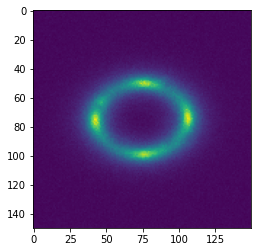

In [ ]:
# Sample Visualization
plt.imshow(image)

[Text(0.5, 1.0, 'Pixel Distribution')]

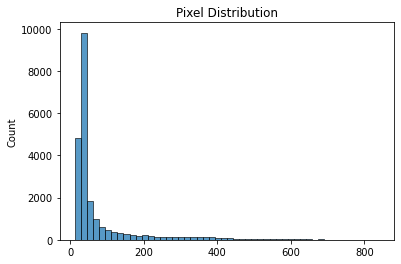

In [ ]:
# Pixel Distribution
sns.histplot(image.ravel(),bins=50).set(title='Pixel Distribution')

### Image Normalization



We can see that the pixel distribution is heavily skewed, this might affect the gradients during backpropagation. The neuron will become saturated if you multiply your weights by large pixel values. But eventually, in order to offset the impact of the large input, your weights will be updated to really small values. Sadly, this will not occur because the gradients for saturated activations will be too small to allow for any appreciable update. Your weights will eventually become stuck. 

Min-Max



Min-max normalization (usually called feature scaling) performs a linear transformation on the original data. This technique gets all the scaled data in the range (0, 1).

>>> $\Large x_{scaled} = \Large\frac{x - x_{min}}{x_{max}-x_{min}}$

In [ ]:
def min_max_filter(image):
  return (image - image.min())/(image.max() - image.min())

In [ ]:
image = lensing_data.get_random_image_sample().copy()
min_max_image = min_max_filter(image)

<Axes: title={'center': 'Min Max Image Pixel Distribution'}, ylabel='Count'>

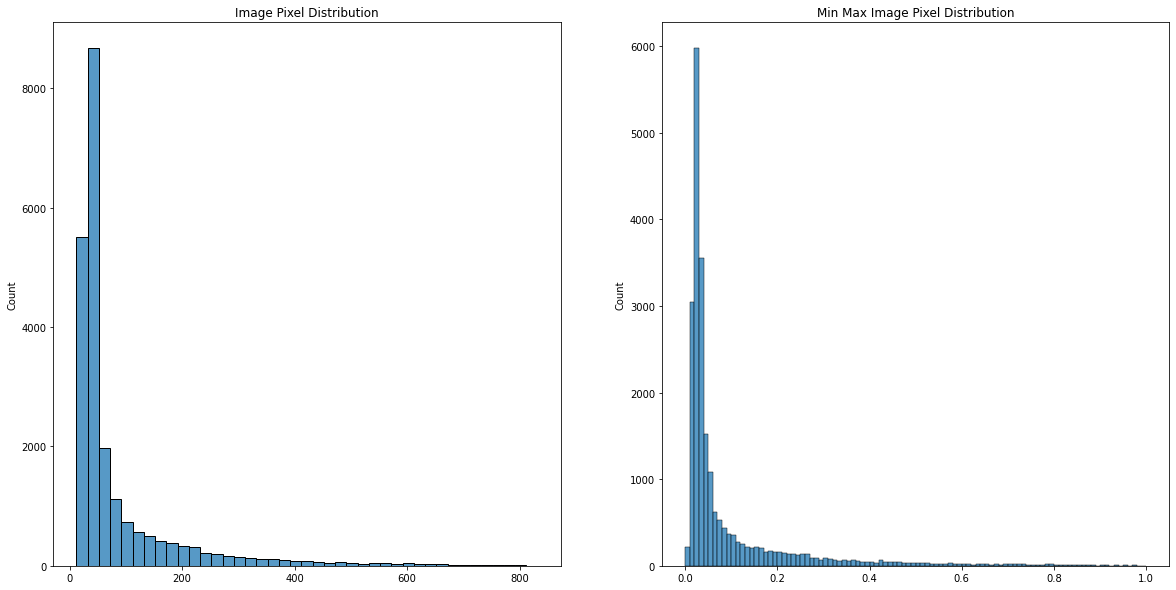

In [ ]:
histfig, axes = plt.subplots(1,2, figsize=(20,10))
axes[0].set_title("Image Pixel Distribution")
axes[1].set_title("Min Max Image Pixel Distribution")
sns.histplot(image.ravel(),binwidth=20,ax=axes[0])
sns.histplot(min_max_image.ravel(), binwidth=0.01,ax=axes[1])

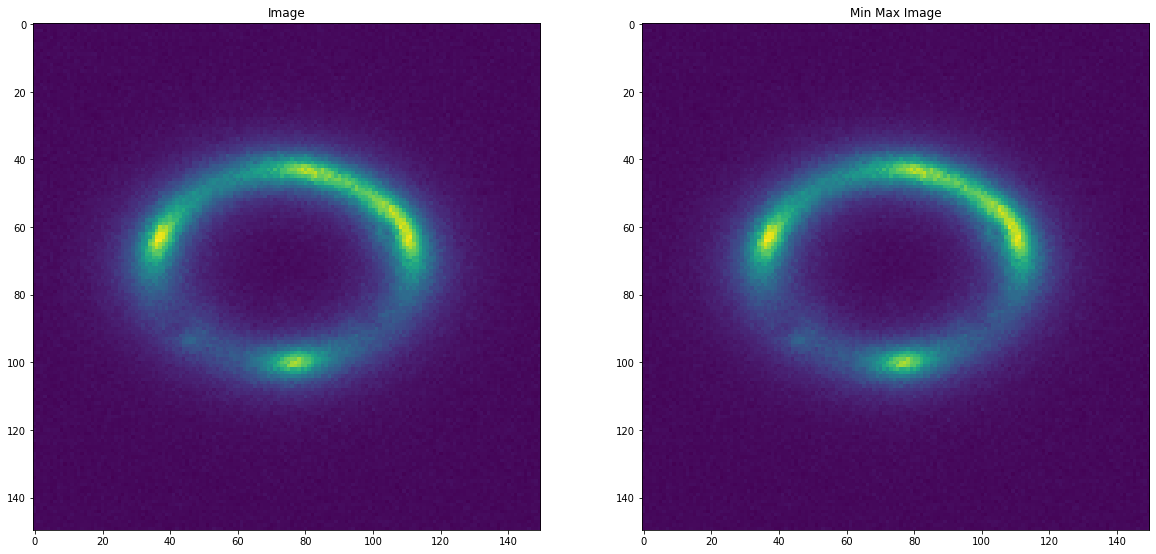

In [ ]:
# If we observe carefully the min max image has more contrast as compared to the base image.
imagefig, axes = plt.subplots(1,2, figsize=(20,20))
axes[0].set_title("Image")
axes[0].imshow(image)

axes[1].set_title("Min Max Image")
axes[1].imshow(min_max_image)

Standardization

These initial inputs will be multiplied (weighted) and added to (biassed) in order to produce activations, which we will then backpropogate with the gradients to train the model. We want each feature in this process to have a comparable range so that our gradients don't get out of hand (and that we only need one global learning rate multiplier). Another way to think about it is that deep learning networks typically share a lot of parameters. If your inputs weren't scaled to produce similarly-ranged feature values (i.e., across the entire dataset by removing the mean), sharing wouldn't be very straightforward because w is too big for some regions of the image and too small for others.

             
>>> $ Z = \Large\frac{x - μ}{σ}$, where $μ$ is the mean and $σ$ is the standard deviation.

In [ ]:
# Calculate mean and std of the entire dataset
def calc_mean_std(dataset):
  psum = 0
  pstd = 0
  for image in dataset:
    image = min_max_filter(image)
    psum += image.sum() 
    pstd += (image**2).sum()
  
  image = lensing_data.get_random_image_sample()
  height = dataset[0].shape[0]
  width = dataset[0].shape[1]
  count = (len(dataset)*height*width)
  mean = psum/count
  std = np.sqrt((pstd/count) - (mean**2))
  return mean, std


mean, std = calc_mean_std(lensing_data.images["train"])
print(mean, std)

0.07407581904556135 0.1178155528000387


[Text(0.5, 1.0, 'Standardized Pixel Distribution')]

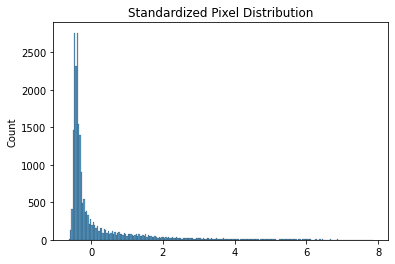

In [ ]:
# Transform to standardized image
standardized_image = (min_max_image - mean)/std
sns.histplot(standardized_image.ravel()).set(title='Standardized Pixel Distribution')

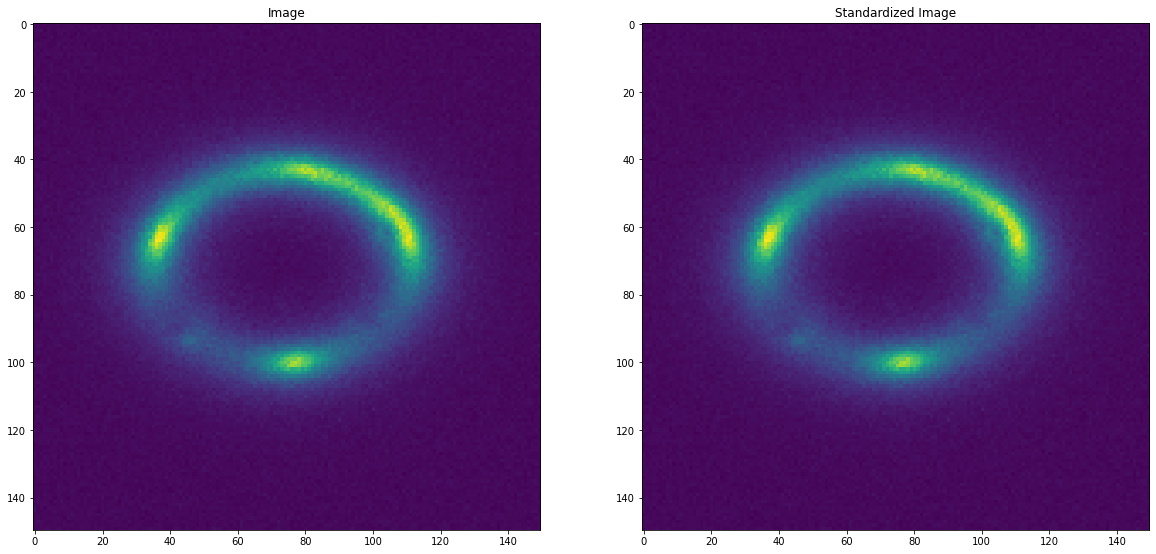

In [ ]:
# Visualize Images
imagefig, axes = plt.subplots(1,2, figsize=(20,20))
axes[0].set_title("Image")
axes[0].imshow(image)

axes[1].set_title("Standardized Image")
axes[1].imshow(standardized_image)

## Mass Analysis

In [ ]:
# Mass Properties
mass = lensing_data.get_random_mass_sample()
print("Mass Type: {}".format(type(mass)))
print("Mass Shape: {}".format(mass.shape))
print("Mass Data Type: {}".format(mass.dtype))

Mass Type: <class 'numpy.float64'>
Mass Shape: ()
Mass Data Type: float64


[Text(0.5, 1.0, 'Mass Distribution')]

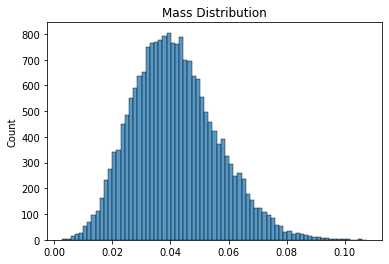

In [ ]:
# Mass Distribution
sns.histplot(lensing_data.masses["train"]).set(title="Mass Distribution")
# Here its a normal distribution, and it seems to be in scale, so no transformations required here.

In [ ]:
# Scaling masses in the range [0,1]
lensing_data.masses["train"] = [item * 10 for item in lensing_data.masses["train"]]

[Text(0.5, 1.0, 'Scaled Mass Distribution')]

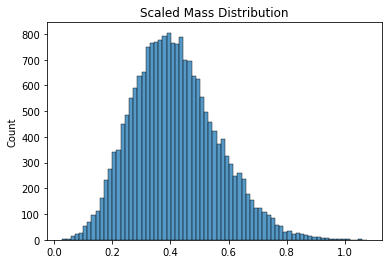

In [ ]:
# Scaled Mass Distribution
# This is to avoid lesser weight values in the network
# Note that this will also effect the final loss values, since the mass values are scaled.
sns.histplot(lensing_data.masses["train"]).set(title="Scaled Mass Distribution")

# Data Pipeline
- Train/Test/Val Split
- Data Transformations/Augmentations
- Custom Pytorch Dataset
- Pytorch Dataloader

## Train/Test/Val Split

In [ ]:
# Performing train, test, val split 
# Train: Test = 90:10, Train: Val = 90:10
lensing_data.train_test_val_split()

Number of Train Samples: 16200, Number of Test Samples: 2000, Number of Validation Samples: 1800


[Text(0.5, 1.0, 'Training Mass Distribution after split')]

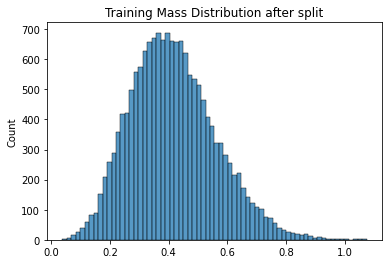

In [ ]:
sns.histplot(lensing_data.masses["train"]).set(title="Training Mass Distribution after split")

[Text(0.5, 1.0, 'Testing Mass Distribution')]

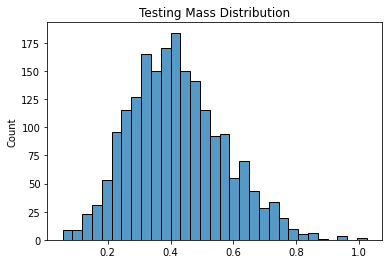

In [ ]:

# Similar distribution as of training mass distribution
sns.histplot(lensing_data.masses["test"]).set(title="Testing Mass Distribution")

[Text(0.5, 1.0, 'Validation Mass Distribution')]

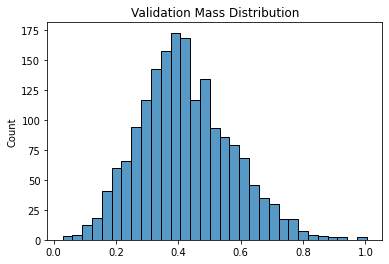

In [ ]:
# Similar distribution as of training mass distribution
sns.histplot(lensing_data.masses["val"]).set(title="Validation Mass Distribution")

## Data Transformations

Performing Data Augmentations as per [[3]](https://arxiv.org/pdf/2112.12121.pdf)

In [ ]:
# Performing Data Transformations/Augmentations

# Normalizing data through mean and std of the entire dataset

data_transformations = {
  "train" : transforms.Compose([
      transforms.ToTensor(),
      # Image Standardization
      transforms.Normalize([0.07408],[0.11782]),
      # Data Augmentations
      transforms.RandomHorizontalFlip(),
      transforms.RandomVerticalFlip(),
      transforms.RandomRotation(degrees=(0,90))
  ]),

  "test": transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize([0.07408],[0.11782])
  ]),

  "val": transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize([0.07408],[0.11782])
  ])
}


## Custom Dataset

In [ ]:
class LensingDataset(Dataset):
  """
    Custom Pytorch Dataset
  """
  def __init__(self, img_data, mass_data, transforms):
      self.imgs = img_data
      self.mass = mass_data
      self.transform = transforms

  def __len__(self):
      return len(self.mass)

  def __getitem__(self, idx):
      image, mass = self.imgs[idx], self.mass[idx]
      # Min max normalization
      image = min_max_filter(image)

      if self.transform is not None:
          image = self.transform(image)
      else:
          image = torch.from_numpy(image)
      
      # Converting tensors to appropriate type for GPU Training according to https://pytorch.org/docs/stable/tensors.html
      return image.type(torch.float32), torch.tensor(mass, dtype=torch.float32)
  
  def min_max_filter(image):
      return (image - image.min())/(image.max() - image.min())

In [ ]:
# Initializing Datasets
dataset_dict = {
    "train": LensingDataset(lensing_data.images["train"], lensing_data.masses["train"], data_transformations["train"]),
    "val": LensingDataset(lensing_data.images["val"], lensing_data.masses["val"], data_transformations["val"]),
    "test": LensingDataset(lensing_data.images["test"], lensing_data.masses["test"], data_transformations["test"])
}

## DataLoader

Upon iterating over several batch sizes, the batch size of 64 seems to be giving an optimal trade off between training time and regression metrics.

In [ ]:
# Initializing DataLoaders
train_dataloader = DataLoader(dataset_dict["train"], batch_size=64, num_workers=2, shuffle=True)
val_dataloader = DataLoader(dataset_dict["val"], batch_size=64, num_workers=2, shuffle=False)
test_dataloader = DataLoader(dataset_dict["test"], batch_size=64, num_workers=2, shuffle=False)

# Model
- Model Definition
- Loss function
- Optimizer
- Training

## Model Definition

[Resnet18](https://pytorch.org/vision/main/models/generated/torchvision.models.resnet18.html) is used as the backbone model. Resnet and resnet like architectures have shown significant performance when it comes to image classification, and hence I am using this as a feature extractor into the dense layer. I chose resnet18 over other deeper networks because of lesser training time and limited GPU resource. The fully connected layer of resnet is modified by adding a dense layer for regression with a single neuron output. The input layer of the resnet is modified to take in single channel images.

One clever optimization of the model would be to freeze the initial base layers upto a depth of 5 or less, and then fine tune the model to this task. This way we can reduce the training time and also leverage the resnets early layers that capture basic information like curves/edges in an image.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torchvision

class MassRegressor(nn.Module):
    def __init__(self):
        super(MassRegressor, self).__init__()
        self.resnet = torchvision.models.resnet18(weights=None)
        # Modifying first layer to accpet single channel input
        self.resnet.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        layers = []
        # Dense MLP layers
        layers += [nn.Linear(512, 256, bias=True), nn.ReLU(inplace=True)]
        layers += [nn.Linear(256, 16, bias=True), nn.ReLU(inplace=True)]
        layers += [nn.Linear(16,1)]
        self.resnet.fc = nn.Sequential(*layers)

    def forward(self, x):
        return self.resnet(x)


model = MassRegressor()
model.to(device=device)

MassRegressor(
  (resnet): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, trac

## Loss Function

Here we are using [MSE loss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html) function according to the evaluation test. But a smoother loss function for regression would be the [Huber Loss](https://pytorch.org/docs/stable/generated/torch.nn.HuberLoss.html) as it is less sensitive to the outliers in the data. 

>>> $MSE(y_i, y_j) = \sum_{i=1}^{D}(y_i-y_j)^2$

In [ ]:
# Mean Squared Error Loss
loss_fn = nn.MSELoss()

## Optimizer

The choice of optimizer is a tricky selection since each optimizer is designed to perform its best for a specific loss topography. There is no one generic optimizer that performs best in every scenario. Its best to understand how the loss curve is from repetitive training and seeing how the loss is decreasing. 

> One interesting experiment that I couldnt not do, was applying different learning rates to different parts of the network, and see how a difference in learning rate affect the networks ability to learn.

I chose the Adam optimizer according to the papers [[2,3]]() where the resnet acheived a remarkable training accuracy of ~97%. I initialized them according to the values in the paper. I also used a one cycle lr scheduler [[4]](https://arxiv.org/abs/1803.09820v2) in place of a cyclic scheduler as mentioned in the paper [[3]]() as it performed relatively better.

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=len(train_dataloader), epochs=100)

## Training

Strategy


- Early Stopping: The training loop is set in a way that if the val loss does not improve for the next 15 epochs, then we stop and save the best model with minimum val loss according to the paper [[3]](https://arxiv.org/pdf/2112.12121.pdf).

- Model Checkpoints: The model checkpointing starts after 25 epochs where the model is saved if the validation loss reduces below the min validation loss.

- Goodness of Fit: We use R-squared as a measure of goodness of fit.


In [ ]:
class TrainWrapper:
  """
    Train Wrapper for training
  """
  def __init__(self, epochs):
    self.epochs = epochs
    self.threshold_epoch = 15
  
  def run_epoch(self, data_loader, train):

    running_loss = 0.

    if train:
      model.train()
    else:
      model.eval()


    for i, data in enumerate(data_loader):

        inputs, labels = data
        inputs, labels = inputs.to(device=device), labels.to(device=device)
        outputs = model(inputs)
        loss = loss_fn(outputs.flatten(), labels.flatten())

        if train:
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

        running_loss += loss.item() * inputs.size(0)
    

    return running_loss/len(data_loader)

  def train(self):
    # validation loss per epoch
    self.val_loss_per_epoch = []
    
    # train loss per epoch
    self.train_loss_per_epoch = []

    start_time = time.time()
    self.min_val_loss = float("inf")
    self.stop_counter = 0

    for ep in tqdm(range(self.epochs), desc='Training loop'):
      # Train one epoch
      # Validate one epoch
      # LR Scheduler step
      train_loss = self.run_epoch(train_dataloader, train=True)
      val_loss = self.run_epoch(val_dataloader, train=False)
      r2_score = self.get_r2_score_test(val_dataloader)
      scheduler.step()

      self.train_loss_per_epoch.append(train_loss)
      self.val_loss_per_epoch.append(val_loss)

      self.checkpoint(ep+1, val_loss)

      print("Epoch: {} - Train loss: {}, Val Loss: {}, R2 Score: {}, Time Elapsed: {}".format(ep+1, train_loss, val_loss, r2_score, time.time() - start_time))

      if self.stop_early():
        print("Stopping Training since Val Loss has not improved for {} epochs".format(self.threshold_epoch))
        break

  def checkpoint(self, epoch_num, val_loss):
    if epoch_num >= 25:
      if self.min_val_loss > val_loss:
        self.save()
        print("--- Saving model ---")
        self.min_val_loss = val_loss
        self.stop_counter = 0
      else:
        self.stop_counter += 1


  def stop_early(self):
    return self.stop_counter == self.threshold_epoch

  def get_r2_score_test(self, data_loader):
    y_true, y_pred = self.get_test_preds_labels(data_loader)
    return r2_score(y_true, y_pred)

  def get_test_preds_labels(self, data_loader):
    y_true = None
    y_pred = None
    with torch.no_grad():
      for i, data in enumerate(data_loader):
        inputs, labels = data[0], data[1]
        inputs = inputs.to(device=device)
        logits = model(inputs)

        if y_true is None:
          y_true = labels.flatten()
        else:
          y_true = torch.cat([y_true.flatten(), labels.flatten()])
        
        if y_pred is None:
          y_pred = logits.flatten()
        else:
          y_pred = torch.cat([y_pred.flatten(), logits.flatten()])
        
        del inputs
    return y_true.numpy(), y_pred.cpu().detach().numpy()


  def test(self):
    model.eval()
    test_loss = self.run_epoch(test_dataloader, train=False)
    print("Test MSE Loss: {}".format(test_loss))

  
  def save(self):
    regression_model_name = "LensingMassRegression"
    model_save_path = F"/content/drive/MyDrive/2023 ML/Model Weights/{regression_model_name}"
    torch.save(model.state_dict(), model_save_path)

  def load(self):
    regression_model_name = "LensingMassRegression"
    model_save_path = F"/content/drive/MyDrive/2023 ML/Model Weights/{regression_model_name}"
    if torch.cuda.is_available():
      model.load_state_dict(torch.load(model_save_path))
    else:
      model.load_state_dict(torch.load(model_save_path, map_location=torch.device('cpu')))

  def plot_loss_curves(self):
    plt.plot(np.arange(len(self.train_loss_per_epoch)+1)[1:], self.train_loss_per_epoch, label="train")
    plt.plot(np.arange(len(self.val_loss_per_epoch)+1)[1:], self.val_loss_per_epoch, label="val")
    plt.legend()

In [ ]:
# Initialize TrainWrapper
trainer = TrainWrapper(100)

In [ ]:
# Start Training
trainer.train()

Training loop:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 - Train loss: 1.524380087793812, Val Loss: 1.4552103044657871, R2 Score: -0.07454134744671514, Time Elapsed: 41.01627445220947
Epoch: 2 - Train loss: 1.4033182223481455, Val Loss: 1.4041557712801571, R2 Score: -0.036842177516224206, Time Elapsed: 77.19069409370422
Epoch: 3 - Train loss: 1.3755257123802591, Val Loss: 1.3814923619401867, R2 Score: -0.0201073017736777, Time Elapsed: 111.50543856620789
Epoch: 4 - Train loss: 1.386266354236781, Val Loss: 1.4757066096725135, R2 Score: -0.08967600251594421, Time Elapsed: 147.37154722213745
Epoch: 5 - Train loss: 1.3424452916961016, Val Loss: 1.9039974037943215, R2 Score: -0.40593007597554265, Time Elapsed: 182.04128050804138
Epoch: 6 - Train loss: 1.3260874037198194, Val Loss: 1.583631328467665, R2 Score: -0.16936866186045574, Time Elapsed: 217.54292559623718
Epoch: 7 - Train loss: 1.2901179914868723, Val Loss: 2.483069426026838, R2 Score: -0.8335224709746372, Time Elapsed: 252.79400658607483
Epoch: 8 - Train loss: 1.225226110184756,

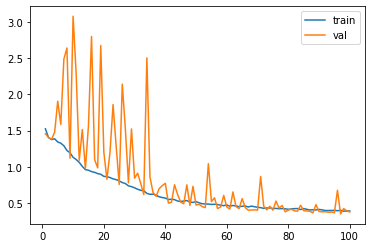

In [ ]:
# Plot loss curves
trainer.plot_loss_curves()

Here is a link to my [model](https://drive.google.com/file/d/1qKadIyVaxJ8OfD3SLvqmkxHbMVuBB-gf/view?usp=share_link), you can just call the load function here as the path to my model in drive is defined inside the load method.

In [ ]:
# Load the best model
trainer.load()

In [ ]:
# Evaluation on test dataset
trainer.test()

Test MSE Loss: 0.36514284601435065


In [ ]:
# R2 score on test
trainer.get_r2_score_test(test_dataloader)

0.7399495992714197

# Conclusion


- We can see that resnet has performed relatively well, and has acheived a decent r2 score.

- One problem we can see is the spikes in validation loss, which can be mitigated if we apply proper regularization which includes, 
 - Ridge/Lasso Regression (L2/L1 Regularization)

 - Adding drop out layers in the model

 - Better data augmentation

- Things that I missed/couldn't include because of time constraint:

 - Initializing weights using Kaiming Initialization for better convergence. [Weight Initializaiton](https://adityassrana.github.io/blog/theory/2020/08/26/Weight-Init.html#Solution:-Let's-Compare-Differrent-Initialization-Strategies)

 - Cross validation for getting the most optimal data split into the network. [Cross Validation](https://www.cs.cmu.edu/~schneide/tut5/node42.html)
 - Adding Proxy Normalizatin Layers instead of Batch Normalization [Proxy-Normalizing Activations to Match Batch Normalization while Removing Batch Dependence
](https://arxiv.org/pdf/2106.03743.pdf)
 - Adapting to [Pytorch Lightning](https://lightning.ai/docs/pytorch/stable/)

# References

1. [Decoding Dark Matter Substructure without Supervision](https://arxiv.org/pdf/2008.12731.pdf)

2. [Deep Learning the Morphology of Dark Matter Substructure](https://arxiv.org/pdf/1909.07346.pdf)

3. [Domain Adaptation for Simulation-Based Dark Matter Searches
Using Strong Gravitational Lensing](https://arxiv.org/pdf/2112.12121.pdf)

4. [A DISCIPLINED APPROACH TO NEURAL NETWORK
HYPER-PARAMETERS: PART 1 – LEARNING RATE,
BATCH SIZE, MOMENTUM, AND WEIGHT DECAY](https://arxiv.org/abs/1803.09820v2)

5. [A Visual Guide to Learning Rate Schedulers in PyTorch](https://towardsdatascience.com/a-visual-guide-to-learning-rate-schedulers-in-pytorch-24bbb262c863)

6. [A Comprehensive Analysis of Deep Regression](https://arxiv.org/pdf/1803.08450.pdf)

7. [FineTuning TorchVision Models](https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html)

8. [The Effect of the Normalization Method Used in Different Sample Sizes on
the Success of Artificial Neural Network Model](https://files.eric.ed.gov/fulltext/EJ1246486.pdf)